# Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
path_data = '../data/'

In [3]:
nodes = pd.read_csv(path_data + 'node_information.csv', header=None) # read data in
nodes.columns = ['id', 'year', 'title', 'authors', 'journal', 'abstract'] # change column names (for visibility)

In [4]:
nodes.head()

,id,year,title,authors,journal,abstract
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...


In [5]:
nodes.tail()

,id,year,title,authors,journal,abstract
27765,9912289,2002,gauge fixing in the chain by chain method,"A Shirzad, F Loran",NaN,in a recent work we showed that for a hamilton...
27766,9912290,2000,shuffling quantum field theory,Dirk Kreimer,Lett.Math.Phys.,we discuss shuffle identities between feynman ...
27767,9912291,1999,small object limit of casimir effect and the s...,"O. Kenneth, S. Nussinov",Phys.Rev.,we show a simple way of deriving the casimir p...
27768,9912292,1999,1 4 pbgs and superparticle actions,"F.Delduc, E. Ivanov, S. Krivonos",NaN,karpacz poland september 21-25 1999 we constru...
27769,9912293,2000,corrections to the abelian born-infeld action ...,L. Cornalba (I.H.E.S.),JHEP,noncommutative geometry in a recent paper seib...


In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27770 entries, 0 to 27769
Data columns (total 6 columns):
id          27770 non-null int64
year        27770 non-null int64
title       27770 non-null object
authors     23737 non-null object
journal     20298 non-null object
abstract    27770 non-null object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
nodes = nodes.fillna(0.0) # replace all missing values by 0.0

## Journal titles

In [8]:
journals, counts = np.unique(nodes['journal'].astype(str), return_counts=True) # extract the unique journal titles and its counts
idx = np.argsort(-counts) # sort by decreasing number
journals, counts = journals[idx], counts[idx]

print('Total number of journals: %d' % len(journals))

# get the 10 journals that most papers are published in
for i in range(10):
    print ('\t%s : %d' % (journals[i], counts[i]))

Total number of journals: 285
	0.0 : 7472
	Phys.Lett. : 3575
	Nucl.Phys. : 3571
	Phys.Rev. : 3170
	JHEP : 1957
	Int.J.Mod.Phys. : 938
	Mod.Phys.Lett. : 936
	Class.Quant.Grav. : 556
	J.Phys. : 536
	J.Math.Phys. : 532


From the result, we can see many articles are recorded with unknown journal in which they are published (either they are not yet published, either the data is missing). It appears that all the papers are published in journals that are related to physics (**Phys**).

[]

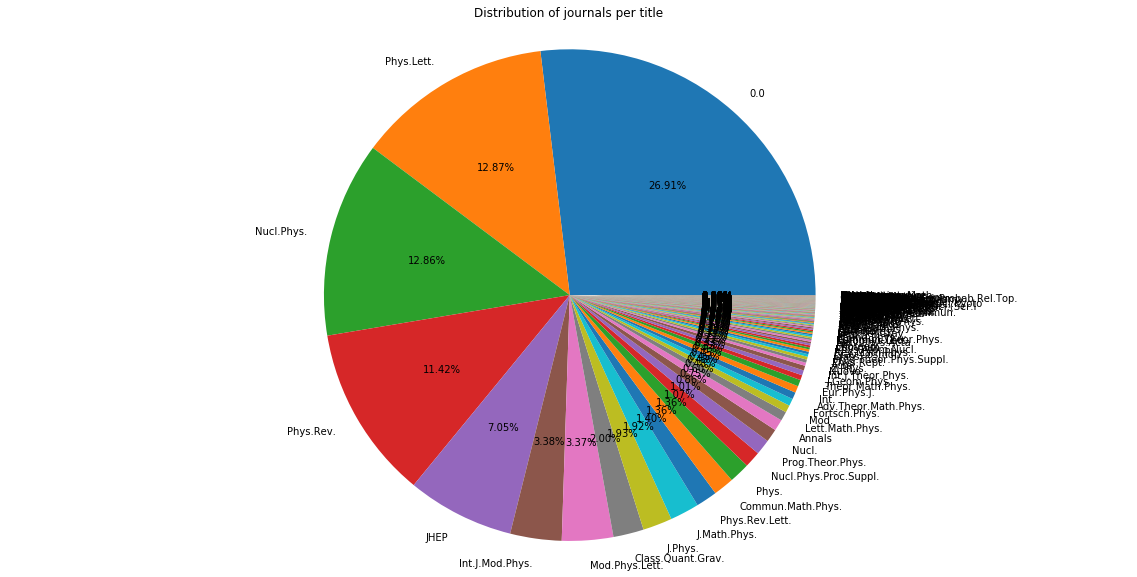

In [9]:
fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title')
ax.pie(counts, labels=journals, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The previous pie chart is not visible, because there are too many "noises" (journals that only appear less than t times). We try to plot a more visible plot, by "crashing" all journals that appear less than a threshold (e.g. t = 100) into an arbitrary category named "misc".

[]

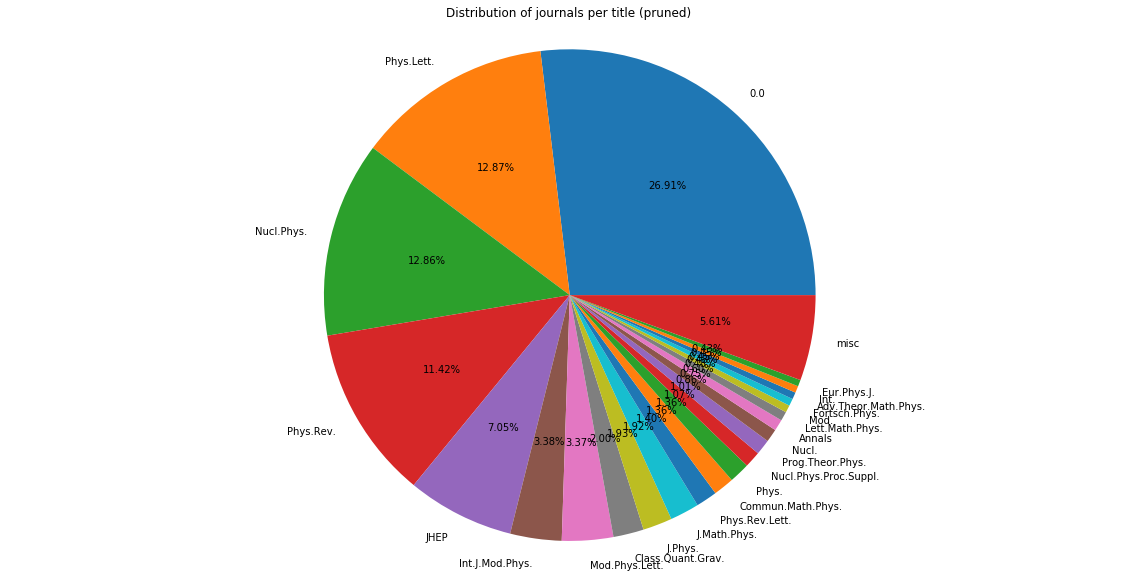

In [10]:
idx_pruned = counts > 100 # get the indices of journals that surpass the threhold t = 100
journals_pr = np.append(journals[idx_pruned], 'misc') # journals that appear less than 100 times are grouped into "misc"
counts_pr = np.append(counts[idx_pruned], sum(counts[~idx_pruned])) # sum up the counts of all articles that appear less than 100 times

fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title (pruned)')
ax.pie(counts_pr, labels=journals_pr, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The new plot is now less "noisy" and more visible, as all the infrequent journals are grouped into **misc**. As observed from the pie, more than 25% of the total articles have missing information about the journal, "Phys.Lett", "Nucl.Phys." and "Phys.Rev" have almost equal size.

### Numbers of authors per article

In this part, we try to extract the number of authors of each article and append the analysis to the augmented dataframe.

In [11]:
nodes_aug = nodes # dataframes of all the articles, augmented by analysis result

In [12]:
# count the number of authors per article, then add the information to the dataframe
nb_authors = np.zeros(len(nodes_aug))
i = 0
for authors in nodes_aug['authors']:
    if authors != 0.0:
        authors = [a for a in authors.split(',')] # split by ','
        nb_authors[i] = len(authors)
        i += 1
nodes_aug['nb_authors'] = nb_authors.astype(int) # add the column 'nb_authors' to the dataframe

In [13]:
nodes_aug.head(10)

,id,year,title,authors,journal,abstract,nb_authors
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,0,these are notes based on lectures given at tas...,1
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,3
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",0,recently ivanov and volovich hep-th 9912242 cl...,2
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,1
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",0,proceedings of lie iii clausthal july 1999 var...,2
5,1006,2000,questions in quantum physics,Rudolf Haag,0,an assessment of the present status of the the...,1
6,1007,2000,topological defects in 3-d euclidean gravity,"Sheng Li, Yong Zhang, Zhongyuan Zhu",0,by making use of the complete decomposition of...,3
7,1008,2000,n 0 supersymmetry and the non-relativistic mon...,Donald Spector,Phys.Lett.,we study some of the algebraic properties of t...,1
8,1009,2000,gluon pair production from space-time dependen...,"Gouranga C. Nayak, Walter Greiner",0,we compute the probabilty for the processes a ...,2
9,1010,2000,instantons euclidean supersymmetry and wick ro...,"A.V. Belitsky, S. V, oren, P. van Nieuwenhuizen",Phys.Lett.,we discuss the reality properties of the fermi...,4


## Publication per year

In [14]:
papers_per_year = np.array(nodes['year'])

In [15]:
years, counts = np.unique(papers_per_year, return_counts=True)

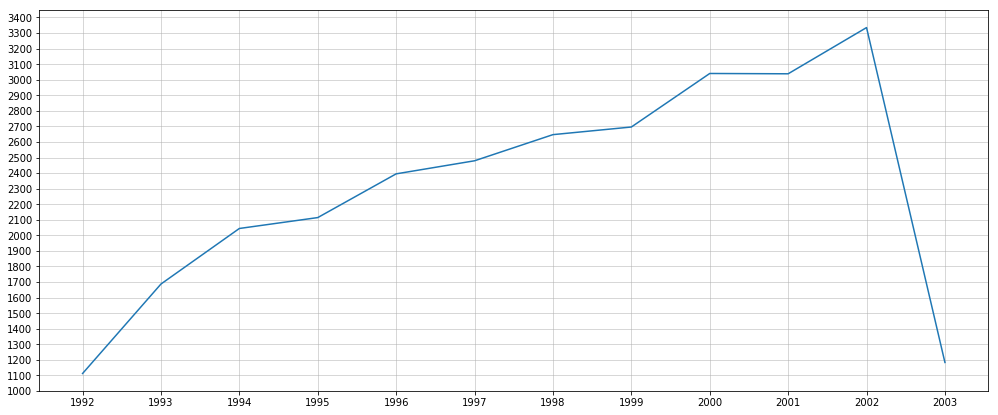

In [16]:
fig, ax = plt.subplots(figsize=(17,7))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot(years, counts)

In [17]:
papers = zip(years,counts)

## Famous authors

In [53]:
group_authors = np.array(nodes['authors'])
authors = []
for group in group_authors:
    if group != 0.0:
        authors += [a.strip() for a in group.split(',')]

In [54]:
unique_authors, counts = np.unique(authors, return_counts=True)
idx = np.argsort(-counts)
unique_authors, counts =  unique_authors[idx], counts[idx]

In [55]:
for i in range(len(counts)):
    print('%s has publised %d articles' % (unique_authors[i], counts[i]))

 has publised 1117 articles
Alex has publised 196 articles
C.N. Pope has publised 125 articles
H. Lu has publised 123 articles
A.A. Tseytlin has publised 84 articles
t has publised 83 articles
Shin'ichi Nojiri has publised 79 articles
Sergei D. Odintsov has publised 75 articles
E. Elizalde has publised 74 articles
Cumrun Vafa has publised 73 articles
Edward Witten has publised 72 articles
S.D. Odintsov has publised 69 articles
Renata Kallosh has publised 67 articles
S. Ferrara has publised 67 articles
Ashok Das has publised 64 articles
M. Cvetic has publised 56 articles
E. Sezgin has publised 54 articles
Burt A. Ovrut has publised 54 articles
Ian I. Kogan has publised 52 articles
Mirjam Cvetic has publised 51 articles
Barton Zwiebach has publised 50 articles
I. Antoniadis has publised 49 articles
Gregory Moore has publised 49 articles
P.K. Townsend has publised 48 articles
Robert C. Myers has publised 47 articles
E. Bergshoeff has publised 47 articles
Amihay Hanany has publised 46 arti

er Turbiner has publised 6 articles
ro Fabbri has publised 6 articles
Raimar Wulkenhaar has publised 6 articles
Takahiro Kubota has publised 6 articles
Kareljan Schoutens has publised 6 articles
(2) has publised 6 articles
Tadaoki Uesugi has publised 6 articles
University of Cambridge has publised 6 articles
R. Pettorino has publised 6 articles
Takahiro Masuda has publised 6 articles
R. Paunov has publised 6 articles
K. Sailer has publised 6 articles
K. Rol has publised 6 articles
R. Mkrtchyan has publised 6 articles
o Falceto has publised 6 articles
Werner Ruehl has publised 6 articles
A. A. Bytsenko has publised 6 articles
Andrew Neitzke has publised 6 articles
Rainer Dick has publised 6 articles
Andrew has publised 6 articles
C. Pena has publised 6 articles
Dieter L\"{u}st has publised 6 articles
Dieter Luest has publised 6 articles
Dimitri Polyakov has publised 6 articles
Takayuki Hirayama has publised 6 articles
R.Tateo has publised 6 articles
Kang Li has publised 6 articles
S. Ar

L. Laperashvili (ITEP has publised 4 articles
A. Feoli has publised 4 articles
L. Jonke has publised 4 articles
N. Kitanine has publised 4 articles
A. Jadczyk has publised 4 articles
V.D.Skarzhinsky has publised 4 articles
Santa Barbara) has publised 4 articles
Gordon Semenoff has publised 4 articles
S. Sethi has publised 4 articles
V.D. Mur has publised 4 articles
Golm) has publised 4 articles
N. Toumbas has publised 4 articles
N. Warner has publised 4 articles
N. Weiss has publised 4 articles
N. Wschebor has publised 4 articles
L. Ch has publised 4 articles
N.B. Narozhny has publised 4 articles
Giancarlo Rossi has publised 4 articles
N.D. Hari Dass (IMSc has publised 4 articles
N. Sousa has publised 4 articles
an Dasmahapatra has publised 4 articles
H.Aratyn has publised 4 articles
Mikhail S.Volkov has publised 4 articles
Vadim Kaplunovsky has publised 4 articles
Hitoshi Murayama (Berkeley) has publised 4 articles
Hisashi Kikuchi has publised 4 articles
Martijn Wijnholt has publised 

T. Dereli (METU has publised 2 articles
T. Damour (I.H.E.S. has publised 2 articles
Avinash Khare (Institute of Physics has publised 2 articles
J.A. Nieto has publised 2 articles
Artemio Gonzalez-Lopez has publised 2 articles
T. Christodoulakis has publised 2 articles
O. A. Olkhov (Institute of Chemical Physics has publised 2 articles
T. Brotz has publised 2 articles
T. Biswas has publised 2 articles
J.Ananias Neto has publised 2 articles
Nuria Rius has publised 2 articles
P. Ginsparg has publised 2 articles
T. Asakawa has publised 2 articles
Nuno Reis has publised 2 articles
T. has publised 2 articles
J.C. P\'erez has publised 2 articles
P. Goddard has publised 2 articles
J.C. Rojas has publised 2 articles
J.C. Shaw has publised 2 articles
Nuclear Physics has publised 2 articles
J.C. Taylor has publised 2 articles
P. Grange has publised 2 articles
Novosibirsk has publised 2 articles
C.Wetterich has publised 2 articles
A.Yu. Kamenshchik has publised 2 articles
T. Multamaki has publised

Douglas J. has publised 2 articles
Gabriele Travaglini (Durham) has publised 2 articles
Tom\'as Ort\'{\i}n has publised 2 articles
\c{S}. Ko\c{c}ak has publised 2 articles
Douglas Singleton has publised 2 articles
I. M. Singer has publised 2 articles
Gabriele Ferretti (Uppsala University) has publised 2 articles
I. Maksymyk has publised 2 articles
Chigak Itoi (Nihon U) has publised 2 articles
Valentina Riva has publised 2 articles
A.B. Balantekin (Wisconsin U. has publised 2 articles
I. A. Batalin has publised 2 articles
E. Derrick has publised 2 articles
Y. Arakane has publised 2 articles
Houari Merabet has publised 2 articles
Christian Beck has publised 2 articles
E. Imeroni has publised 2 articles
Howard J. Schnitzer (Br has publised 2 articles
George has publised 2 articles
Georg M. G has publised 2 articles
E. Itou has publised 2 articles
Chris Van Den Broeck has publised 2 articles
D.J.Broadhurst has publised 2 articles
Chris M. Hull has publised 2 articles
Huan-Xiong Yang has pu

er Migdal has publised 1 articles
er Migdal (Princeton University) has publised 1 articles
er Mitov has publised 1 articles
er Molev has publised 1 articles
P. Olesen (The Niels Bohr Institute) has publised 1 articles
Arkady Vaintrob has publised 1 articles
er Moroz has publised 1 articles
er Niemeyer has publised 1 articles
P. O. Kazinski has publised 1 articles
er O. Harin has publised 1 articles
er P. Kobushkin has publised 1 articles
P. Nicolini has publised 1 articles
er R. Its has publised 1 articles
P. Peter (IAP) has publised 1 articles
P. Pitanga (Universidade Federal do Rio de Janeiro - UFRJ) has publised 1 articles
er Givental has publised 1 articles
P. Pouliot (Rutgers University) has publised 1 articles
Arkadii A. Popov has publised 1 articles
er A.Belov has publised 1 articles
er Antonov has publised 1 articles
P. Silaev has publised 1 articles
er Astashkevich has publised 1 articles
Arkady A. has publised 1 articles
P. Scudellaro has publised 1 articles
A.A.Penin has pub

T. Sizer has publised 1 articles
T. Shiromizu (U. of Tokyo) has publised 1 articles
T. Shiromizu has publised 1 articles
T. Shiota has publised 1 articles
Takashi Okamura has publised 1 articles
Takashi Okamura (Ochanomizu University) has publised 1 articles
T. Shinohara has publised 1 articles
T. Shimada has publised 1 articles
T. Shigehara has publised 1 articles
Takashi Sano has publised 1 articles
T. Schucker (Marseille) has publised 1 articles
T. Schucker (CPT-Marseille) has publised 1 articles
Takashi Suzuki has publised 1 articles
Takashi Takebe (University of has publised 1 articles
T. Sasada has publised 1 articles
T. Sami (SUBATECH has publised 1 articles
Takashi Tokunaga has publised 1 articles
A.V. Romanenko (Kiev Taras has publised 1 articles
T. Sami (2) ((1) USTHB has publised 1 articles
T. Saito (Kwansei Gakuin Univ.) has publised 1 articles
Takashi Uchino has publised 1 articles
T. S. Evans has publised 1 articles
T. S. Biro has publised 1 articles
Takeshi Inagaki has p

Alin Tirziu has publised 1 articles
V. Soucek has publised 1 articles
V. Srinivasan has publised 1 articles
S. Sugimoto (NBI) has publised 1 articles
S. Stieberger (CERN) has publised 1 articles
V. Talamini has publised 1 articles
A. Balaz (Institute of Physics has publised 1 articles
V. Ter-Antonian has publised 1 articles
V. Ter-Antonyan has publised 1 articles
V. V. Arkhipov has publised 1 articles
S. Solganik has publised 1 articles
S. Slavnov has publised 1 articles
V. V. Bazhanov (ANU) has publised 1 articles
S. Sinha has publised 1 articles
S. Shnider has publised 1 articles
S. Shinohara (Kyoto Univ.) has publised 1 articles
V. V. Khruschev (1) has publised 1 articles
V. Ravishankar (Dept. of physics Indian Institute of has publised 1 articles
A. Donini has publised 1 articles
Dagny Kimberly has publised 1 articles
Olivier Coussaert has publised 1 articles
A. Masiero has publised 1 articles
Hyun-Soo Min has publised 1 articles
Hyung Do Kim (KAIST) has publised 1 articles
Hyung D

Esko Keski-Vakkuri (Helsinki Inst. of Physics) has publised 1 articles
Emanuel R. de Oliveira has publised 1 articles
Emanuel Scheidegger (AEI has publised 1 articles
Emanuel Scheidegger (LMU has publised 1 articles
Emanuele Berti has publised 1 articles
D.A. Korotkin has publised 1 articles
D.A. Komarov has publised 1 articles
Emil M. Prodanov (NCSR "Demokritos" has publised 1 articles
D.-U. Jungnickel has publised 1 articles
Emil Martinec} has publised 1 articles
Emil Mottola (2) has publised 1 articles
Emil T.Akhmedov (ITEP has publised 1 articles
D. Zwanziger (New York University) has publised 1 articles
Emiliano Imeroni has publised 1 articles
Emiliano Sefusatti has publised 1 articles
Emily J. Hackett-Jones has publised 1 articles
Emmanuel Floratos has publised 1 articles
Emmanuel Loyer has publised 1 articles
Elso Drigo filho has publised 1 articles
Emmanuel T. Rodulfo has publised 1 articles
D.A. Owen has publised 1 articles
Eloy Ay\'on-Beato has publised 1 articles
El Hassan E

Bo-yuan Hou has publised 1 articles
Bo-Yuan Hou (Chinese has publised 1 articles
M. Perelstien has publised 1 articles
Bo-Yuan Hou has publised 1 articles
M. Perkins has publised 1 articles
Bo-Yu Hou (Northwest University has publised 1 articles
Bo-Yu Hou (Institute of Modern Physics has publised 1 articles
M. Piai has publised 1 articles
M. Pitschmann has publised 1 articles
M. Plyushchay has publised 1 articles
A. Hammou (SISSA has publised 1 articles
M. Porrati (Department of Physics has publised 1 articles
Bo-Sture K Skagerstam has publised 1 articles
M. R. Abolhassani has publised 1 articles
Bhubaneswar) has publised 1 articles
M. Ruiz--Altaba has publised 1 articles
M. S. Goes-Negrao (UCP-RJ) has publised 1 articles
M. Schwetz (Yale University) has publised 1 articles
M. Seeger has publised 1 articles
M. Seeger (Institut fuer Theoretische Physik has publised 1 articles
M. Semenov-Tian-Shansky has publised 1 articles
Bijon Bagchi has publised 1 articles
M. Shaposhnikov has publise

Jens Mund (FU Berlin) has publised 1 articles
C.Kiefer has publised 1 articles
Jens Ole Madsen (Universidade has publised 1 articles
C.J.Hunter has publised 1 articles
Jens UH Petersen has publised 1 articles
C.J.Burden has publised 1 articles
JeongHyeong Park has publised 1 articles
Jeremie Unterberger has publised 1 articles
Jeremie Vinet has publised 1 articles
C.J.A.P. Martins has publised 1 articles
Jeroen Snippe has publised 1 articles
Joakim Arnlind has publised 1 articles
C.H. Oh has publised 1 articles
Jian-zu Zhang (Kaiserslautern has publised 1 articles
Jin Young Kim (PNU has publised 1 articles
A. Kobakhidze has publised 1 articles
C.G. Carvalhaes has publised 1 articles
Jing-bo Chen has publised 1 articles
Jinr has publised 1 articles
Jinsub Paeng has publised 1 articles
Jiong-Ming Zhu has publised 1 articles
Jiro Arafune has publised 1 articles
Jiro Hashiba (Yukawa Inst.) has publised 1 articles
C.G. Callan has publised 1 articles
Jiunn-Wei Chen has publised 1 articles
Jl